In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping

sns.set()

2022-11-10 20:34:10.257060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 20:34:10.421518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 20:34:10.421537: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 20:34:10.450953: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 20:34:11.182940: W tensorflow/stream_executor/platform/de

In [2]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
y_train = data_train.iloc[:, 0].values
X_train = data_train.iloc[:, 1:].values

y_test = data_test.iloc[:, 0].values
X_test = data_test.iloc[:, 1:].values


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
print(np.unique(y_train))
y_train = pd.get_dummies(y_train).values
y_train

[0 1 2 3 4 5 6 7 8 9]


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [7]:
y_test = pd.get_dummies(y_test).values
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
es = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=300, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

2022-11-10 20:34:16.656326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 20:34:16.656354: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 20:34:16.656375: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pooria-zenbook): /proc/driver/nvidia/version does not exist
2022-11-10 20:34:16.656612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [11]:
history = model.fit(X_train, y_train, epochs=30, batch_size=200, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/30


2022-11-10 20:34:17.086771: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


300/300 [==============================] - 2s 5ms/step - loss: 0.8145 - categorical_accuracy: 0.7303 - val_loss: 0.4577 - val_categorical_accuracy: 0.8406
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.4826 - categorical_accuracy: 0.8325 - val_loss: 0.4018 - val_categorical_accuracy: 0.8579
Epoch 3/30
300/300 [==============================] - 1s 5ms/step - loss: 0.4289 - categorical_accuracy: 0.8482 - val_loss: 0.3678 - val_categorical_accuracy: 0.8679
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3994 - categorical_accuracy: 0.8572 - val_loss: 0.3519 - val_categorical_accuracy: 0.8706
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3804 - categorical_accuracy: 0.8629 - val_loss: 0.3454 - val_categorical_accuracy: 0.8742
Epoch 6/30
300/300 [==============================] - 1s 5ms/step - loss: 0.3561 - categorical_accuracy: 0.8705 - val_loss: 0.3229 - val_categorical_accuracy: 0.8829
Epoch 7/30
300/

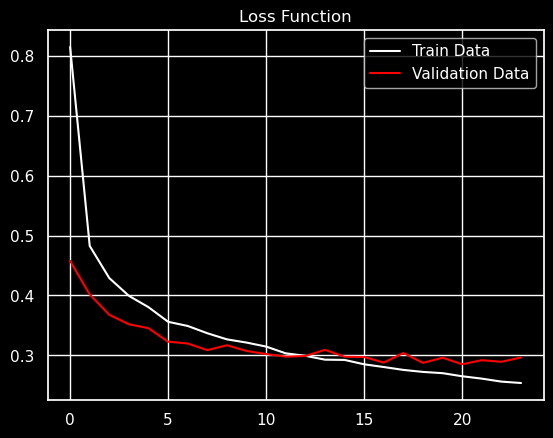

In [12]:
plt.style.use('dark_background')
plt.plot(history.history['loss'], color='white', label='Train Data')
plt.plot(history.history['val_loss'], color='red', label='Validation Data')
plt.title('Loss Function')
plt.legend()
plt.show()